# Derivatives in Theano

In [1]:
import numpy as np
from theano import tensor as T
from theano import function
from theano.gradient import jacobian
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 6
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Introduction to Derivatives

### What is a derivative of a function?
**A measure of how the function changes when changes are made to its _independent_ variable(s).**

**When this dependent variable is time, this is also called the _rate of change_ of the function.**

## Example: $$ f(x) = 2x $$

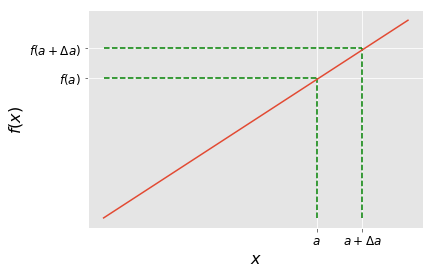

In [2]:
xx = np.linspace(0, 100, 100)
yy = 2 * xx
plt.plot(xx, yy)
plt.vlines(70, 0, yy[70], linestyles="dashed", colors="g")
plt.vlines(85, 0, yy[85], linestyles="dashed", colors="g")
plt.hlines(yy[70], 0, 70, linestyles="dashed", colors="g")
plt.hlines(yy[85], 0, 85, linestyles="dashed", colors="g")
plt.xticks([70, 85], [r"$a$", r"$a + \Delta a$"], fontsize=12, color="k")
plt.yticks([yy[70], yy[85]], [r"$f(a)$", r"$f(a + \Delta a)$"], fontsize=12, color="k")
plt.xlabel(r'$x$', fontsize=16, color="k")
plt.ylabel(r'$f(x)$', fontsize=16, color="k")

## Derivative of $f$
### also called _slope_ or _gradient_ of $f$

### $$ f'(x) = \frac{df}{dx} = \lim_{x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x} $$

# Example: Derivative of the sigmoid function

In [3]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

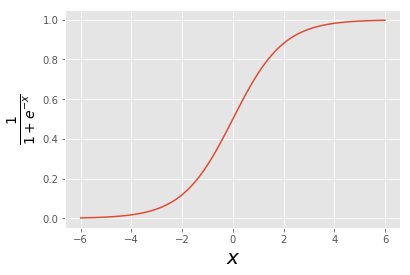

In [4]:
x = np.linspace(-6, 6, 100)
f = sigmoid(x)

plt.plot(x, f)

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.ylabel(r'$\frac{1}{1 + e^{-x}}$', fontsize=20, color="k")

# Chain rule of differentiation:
# $$ \frac{d}{dx}[f(g(x))] = \frac{df}{dg}\frac{dg}{dx}$$

### Suppose $$g(x) = 1 + e^{-x}$$
### $$\therefore f(x) = \frac{1}{g}$$

### Thus by chain rule:
### $$f'(x) = \frac{df}{dg} g'(x)$$
### $$\therefore f'(x) = -\frac{df}{dg}e^{-x}$$
### $$\therefore f'(x) = -\frac{d}{dg}\frac{1}{g}e^{-x}$$
### $$\therefore f'(x) = \frac{1}{g^{2}}e^{-x}$$
### $$\therefore f'(x) = \frac{e^{-x}}{(1 + e^{-x})^{2}}$$
### Adding and subtracting unity from the numerator:
### $$f'(x) = \frac{1 + e^{-x} - 1}{(1 + e^{-x})^{2}}$$
### Splitting the fraction
### $$f'(x) = \frac{1 + e^{-x}}{(1 + e^{-x})^{2}} - \frac{1}{(1 + e^{-x})^{2}}$$
### Simplifying...
### $$f'(x) = \frac{1}{1 + e^{-x}} - \frac{1}{(1 + e^{-x})^{2}}$$
### $$f'(x) = \frac{1}{1 + e^{-x}}\bigg(1 - \frac{1}{1 + e^{-x}}\bigg)$$
### Substituting for sigmoid function:
### $$f'(x) = f(1 - f)$$

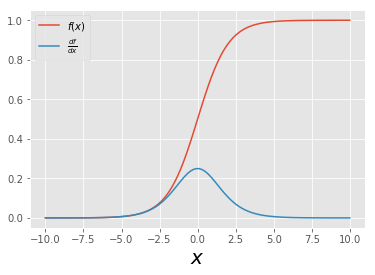

In [5]:
x = np.linspace(-10, 10, 100)
f = sigmoid(x)
df_dx = f * (1 - f)

plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, df_dx, label=r'$\frac{df}{dx}$')

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.legend()

# Enter Theano

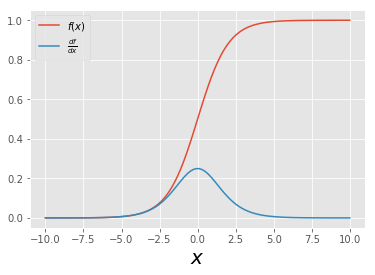

In [6]:
x = T.dvector('x')
f = 1 / (1 + T.exp(-x))
df_dx = T.grad(f.sum(), wrt=[x])
sigmoid = function([x], f)
d_sigmoid = function([x], df_dx)

xx = np.linspace(-10, 10, 100)

plt.plot(xx, sigmoid(xx), label=r'$f(x)$')
plt.plot(xx, d_sigmoid(xx)[0], label=r'$\frac{df}{dx}$')

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.legend()

# Exercise: Plot the Hyperbolic Tangent function and its derivative
## $$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

In [8]:
# enter code here

# Multivariate Functions

## Example: $f(x, y) = x^{2}y + y$

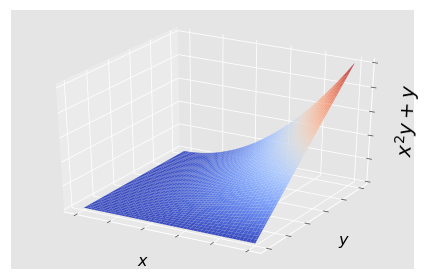

In [3]:
xx = np.linspace(0, 10, 100)
yy = np.linspace(0, 10, 100)
X, Y = np.meshgrid(xx, yy)
f = Y * (X ** 2 + 1)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f, cmap=plt.cm.coolwarm)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel(r'$x$', fontsize=16, color="k")
ax.set_ylabel(r'$y$', fontsize=16, color="k")
ax.set_zlabel(r'$x^{2}y + y$', fontsize=20, color="k", labelpad=0)
ax.autoscale_view()
plt.tight_layout()

## Introducing Partial Derivatives
### A partial derivative of a multivariate function $f(x_{1}, x_{2}, ...)$, w.r.t. to one of it's dependent variables, say $x_{1}$ is derivative of $f$ w.r.t. $x_{1}$ assuming $x_{k} \forall k \neq 1$ to be constant.

### How many such derivatives?
### Thus, a partial derivative is always a vector.

### Given $f(x, y) = x^{2}y + y$
### Partial derivative of $f$ w.r.t $x$ is $\frac{\partial{f}}{\partial{x}}$
### Partial derivative of $f$ overall is $\nabla{f}$
### $$\nabla{f} = \begin{bmatrix}
\frac{\partial{f}}{\partial{x}}\\
\frac{\partial{f}}{\partial{y}}
\end{bmatrix}$$
### By derivation,
### $$\frac{\partial{f}}{\partial{x}} = 2xy$$
### $$\frac{\partial{f}}{\partial{y}} = x^{2} + 1$$
### Thus
### $$\nabla{f} = \begin{bmatrix}
2xy\\
x^{2} + 1
\end{bmatrix}$$


In [4]:
del_f = np.c_[2 * xx * yy, (xx ** 2) + 1].T
print(del_f.shape)

(2, 100)


# Enter `theano.gradient.jacobian`

In [5]:
x = T.dvector('x')
y = T.dvector('y')
f = (x ** 2) * y + y
delf = jacobian(f.sum(), wrt=[x, y])
get_jacobian = function([x, y], delf)

J1 = np.c_[get_jacobian(xx, yy)]

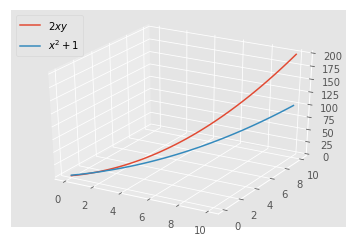

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xx, yy, J1[0, :], label=r"$2xy$")
ax.plot(xx, yy, J1[1, :], label=r"$x^{2} + 1$")
ax.legend()

# Exercise: $f(x, y) = \sin(\sqrt{x^{2} + y^{2}})$
# 1. Plot surface of $f$
# 2. Find and plot$\nabla{f}$

In [7]:
# enter code here